In [1]:
import pandas as pd

O objetivo com este dataset é prever se uma pessoa irá ganhar mais de 50K ano, a partir de várias informações como idade, tipo de emprego, educação, informação da familia, etc.

In [2]:
adult_census = pd.read_csv("adult_census.csv")

In [3]:
adult_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


A variável com nome de **"class"** é a nossa variável target. E ela contém duas possíveis classes:

    -->  (<=50K : low-revenue)
    -->  (>50K : high-revenue)

O problema de predição é portanto, um problema de classificação binária. 

In [4]:
target_column = 'class'
adult_census[target_column].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

Como podemos ver acima as classes são imbalanceadas, significando que há mais amostras de pessoas de uma classe comparando com outras. Para exemplos mais específicos, como aplicações médicas, há uma necessidade de balancear as classes.

O dataset contém colunas numéricas e categóricas que podem ser separadas como:

In [5]:
numerical_columns = adult_census.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [6]:
categorical_columns = adult_census.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')

Podemos checar o número de samples e o número de colunas presentes no dataset

In [7]:
print(f"O dataset contém {adult_census.shape[0]} samples e {adult_census.shape[1]} features.")

O dataset contém 48842 samples e 15 features.


## Inspeção visual das variáveis.
***

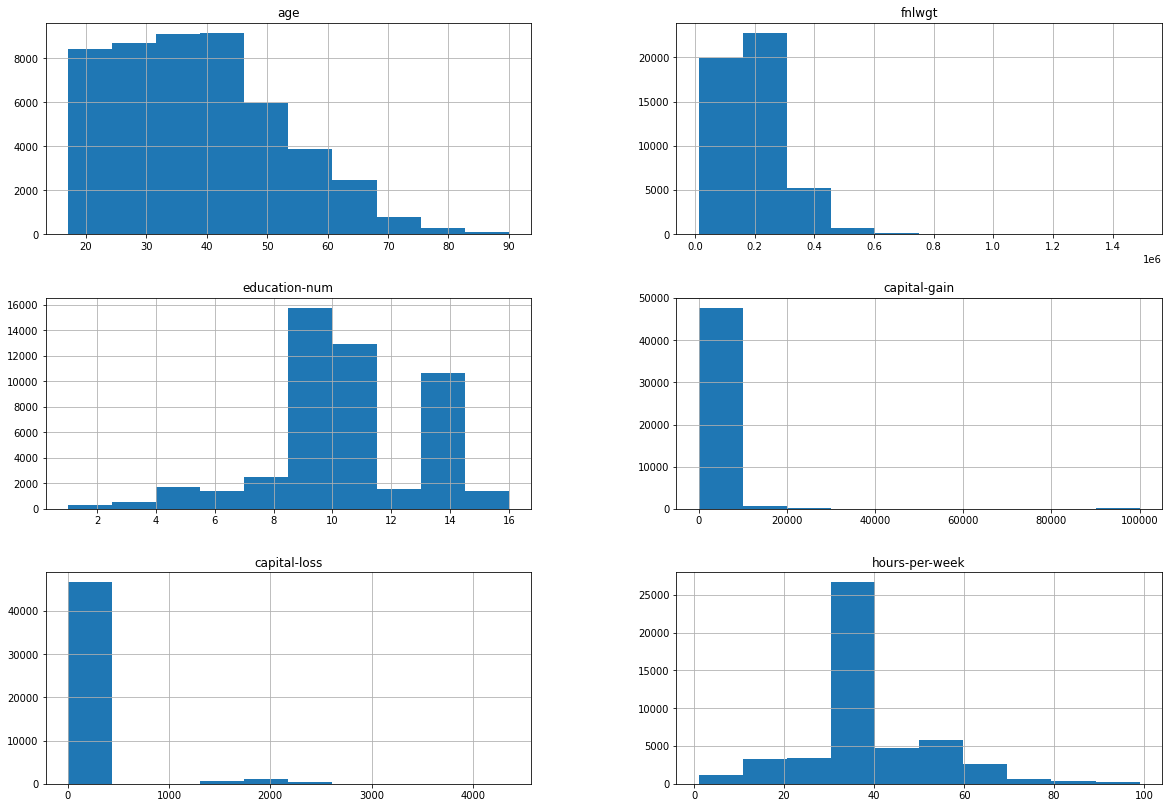

In [8]:
_ = adult_census.hist(figsize=(20, 14))

### Variáveis categóricas
***

 Male      32650
 Female    16192
Name: sex, dtype: int64

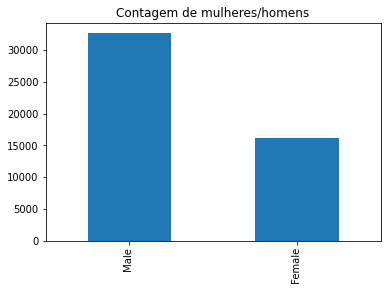

In [9]:
display(adult_census['sex'].value_counts())
_ = adult_census['sex'].value_counts(sort=True).plot.bar(title='Contagem de mulheres/homens')

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64


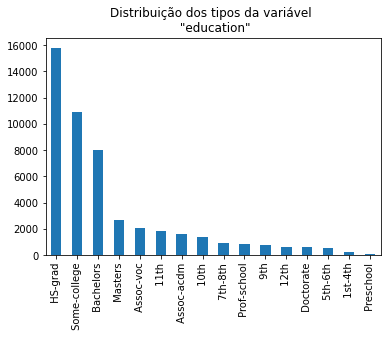

In [10]:
print(adult_census['education'].value_counts())
_ = adult_census['education'].value_counts(sort=True).plot.bar(title ='Distribuição dos tipos da variável \n "education"')

A variável "education-num" representa o número em anos de educação (formação escolar).Vamos estudar a relação entre os tipos (classes de educação) e o número de anos de educação formal.

In [11]:
pd.crosstab(index=adult_census['education'],
            columns=adult_census['education-num'])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


Podemos concluir da saída da tabela acima que as variáveis: education, education-num. Contém a mesma informação, portanto uma delas "education-num", pode ser descartada. Lembrando que variáveis altamente correlacionadas ou redudantes podem ser um problema para alguns algoritmos de machine learning.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
_ = adult_census.drop(columns=['education-num'], axis = 1, inplace = True)
adult_census.sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
7519,45,Local-gov,213334,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K
39186,36,Private,185099,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,>50K
43008,65,Private,113323,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
19722,20,Private,161922,HS-grad,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,43,United-States,<=50K
16550,33,Private,222205,HS-grad,Married-civ-spouse,Craft-repair,Wife,White,Female,0,0,40,United-States,>50K
24527,30,Federal-gov,355789,HS-grad,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,50,United-States,<=50K
28769,30,Private,202450,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,65,United-States,>50K
25016,36,Private,103323,Assoc-acdm,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,2829,0,40,United-States,<=50K
13129,39,Private,30056,Some-college,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
17582,29,Private,419721,HS-grad,Never-married,Other-service,Unmarried,Black,Female,0,0,40,Japan,<=50K


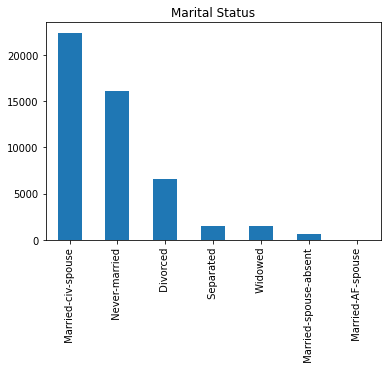

In [14]:
plt.title('Marital Status')
_ = adult_census['marital-status'].value_counts().plot.bar()

Neste dataset queremos saber quais diferenças são mais importantes na hora de determinar qual será o ganho, ou melhor colocando quais variáveis tem maior impacto para determinar se uma pessoa vai ganhar mais de 50k ou menos anual.

Podemos usar a função pandas groupby para separar as variáveis independentes de acordo com a variável target, e assim ter uma idéia de como as features estão distribuídas nas classes.

In [15]:
round(adult_census.groupby(['class']).mean(), 2)

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
class,,,,,
<=50K,36.87,190039.57,147.01,54.15,38.84
>50K,44.28,188470.57,4042.24,193.53,45.45


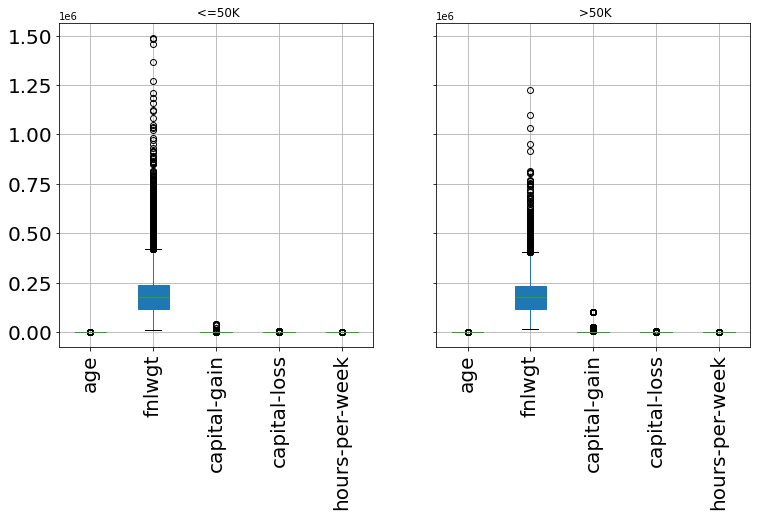

In [16]:
_ = adult_census.groupby('class').boxplot(fontsize=20, rot=90, figsize=(12,6), patch_artist=True)

Podemos notar que, como os valores estão em diferentes escalas nas variáveis é dificil comparar as duas distribuições. Uma maneira de resolver esse problema é rescalar as variáveis. Para executar essa tarefa pode usar a função do scikit-learn **MinMaxScaler**. Esta função irá rescalonar os valores para ficar entre 0 e 1.

In [17]:
numerical_columns = ['age', 'fnlwgt','capital-gain', 'capital-loss',
       'hours-per-week']

In [18]:
from sklearn.preprocessing import MinMaxScaler

numeric_data = adult_census[numerical_columns]
numerical_data = numeric_data.copy()
categorical_data = adult_census[categorical_columns]

x = numeric_data.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
numeric_data = pd.DataFrame(x_scaled, columns = numeric_data.columns)
df_transformed = pd.concat([numeric_data, categorical_data], axis = 1)
df_transformed.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,0.109589,0.145129,0.000000,0.0,0.397959,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,0.287671,0.052451,0.000000,0.0,0.500000,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,0.150685,0.219649,0.000000,0.0,0.397959,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,0.369863,0.100153,0.076881,0.0,0.397959,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,0.013699,0.061708,0.000000,0.0,0.295918,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


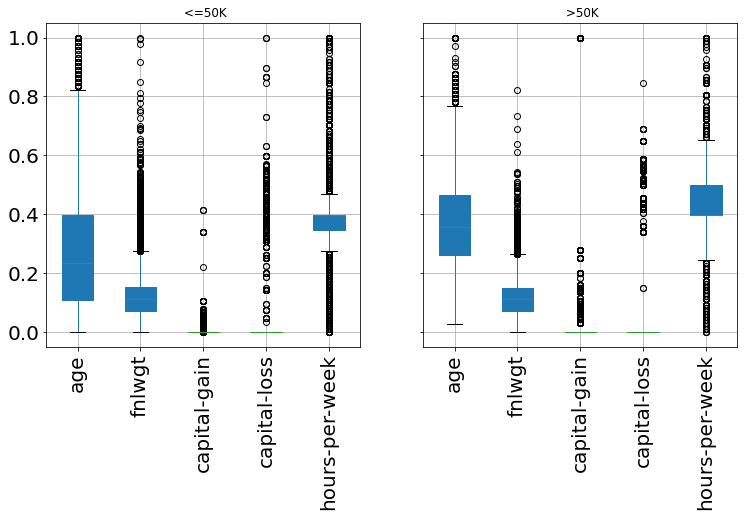

In [19]:
_ = df_transformed.groupby('class').boxplot(fontsize=20, rot=90, figsize=(12,6), patch_artist=True)

Depois de escalar as features podemos ver claramente que features como "age" e "hours-per-week" tem diferenças em relação as classes target.

class   sex    
 <=50K   Male      22732
         Female    14423
 >50K    Male       9918
         Female     1769
Name: sex, dtype: int64

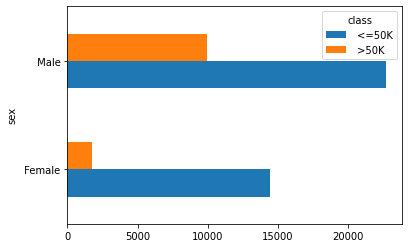

In [20]:
display(adult_census.groupby('class').sex.value_counts())
_ = adult_census.groupby('class').sex.value_counts().unstack(0).plot.barh()

Há mais homens que mulheres no dataset, homens lideram o (low-revenue) e também o high-revenue.

hours-per-week           
class            <=50K       >50K
sex                              
 Female      35.875962  40.678915
 Male        40.720702  46.304396

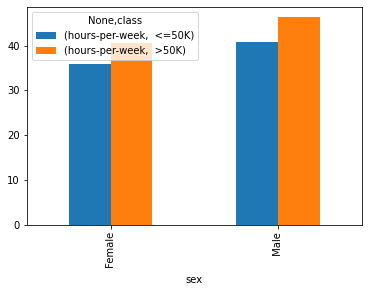

In [21]:
import numpy as np
pivot_workclass = pd.pivot_table(
    adult_census,
    values = ['hours-per-week'],
    index = 'sex',
    columns = 'class',
    aggfunc= np.mean, fill_value = 0
)
display(pivot_workclass)
_ = pivot_workclass.plot.bar()

Podemos usar o pairplot para inspecionar o dataset. Vamos usar um subset para tornar o plot mais rápido

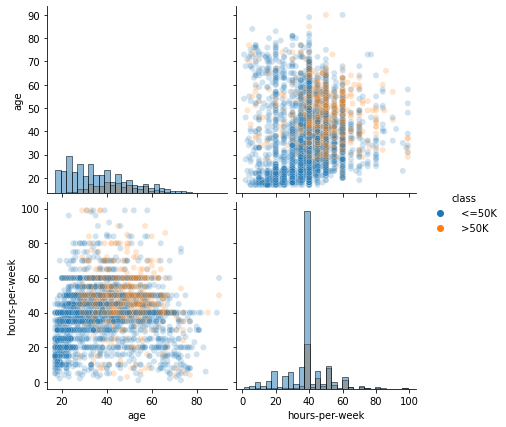

In [22]:
n_samples_to_plot = 5000
columns=['age', 'hours-per-week']
_ = sns.pairplot(data= adult_census[:n_samples_to_plot], vars = columns,
                 hue = target_column, plot_kws={'alpha': 0.2},
                 height=3, diag_kind='hist', diag_kws={'bins':30})

Olhando os gráficos anteriores, e criar na mão uma regra que preveja se alguém tem high ou low "income". E para isso vamos focar apenas nas variáveis **age** e **hours-per-week**.

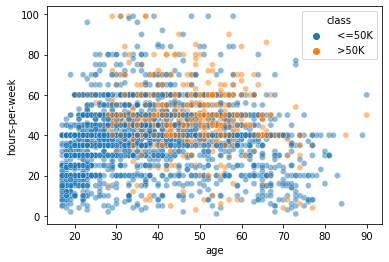

In [23]:
_ = sns.scatterplot(
    x = 'age', y = "hours-per-week", data= adult_census[:n_samples_to_plot],
    hue = "class", alpha = 0.5,
)

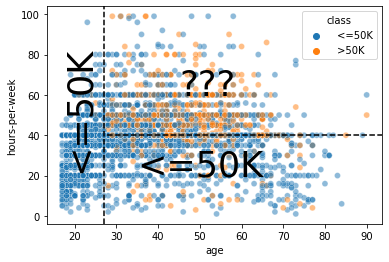

In [24]:
ax = sns.scatterplot(
    x="age", y="hours-per-week", data=adult_census[:n_samples_to_plot],
    hue="class", alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

Da análise do gráfico acima, temos as seguintes informações:

* na região 'age < 27', a predição é "low-income", só "bolinhas" azuis, não podemos enxergar nenhuma laranja.
* na região 'age > 27 AND hours-per-week < 40' há predominantemente pontos azuis e poucos laranjas, e a predição é low-income.
* na região 'age > 27 AND hours-per-week > 40' há um mix de pontos azuis e laranjas. Tornando complicado escolher qual é a classe prevista nesta região.


É interessante notar que alguns algoritmos de ML trabalhando de maneira similar com as regras estabelecidas no gráfico, esses modelos são conhecidos como modelos de árvore de decisão. Há 2 limites(thresholds) que escolhemos (27 years e 40 hours), de maneira arbitrária baseado nos gráficos anteriores. Em contraste com essa escolha a decision tree, irá escolher o melhor "split" baseado nos dados sem intervenção humana ou inspeção.

É importante lembrar que no ajuste de um modelo de machine learning, um modelo automaticamente cria "regras" a partir dos dados em ordem  para fazer previsões em dados não vistos ainda.

## Análise Numérica:

Nas próximas células faremos experimentos considerando apenas os features numéricas + a variável target:

In [25]:
df = pd.concat([numerical_data, adult_census['class']], axis=1)
df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,class
0,25,226802,0,0,40,<=50K
1,38,89814,0,0,50,<=50K
2,28,336951,0,0,40,>50K
3,44,160323,7688,0,40,>50K
4,18,103497,0,0,30,<=50K


### Separando as features e o target.

In [26]:
target_name = 'class'
target = df[target_name]
target

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
48837     <=50K
48838      >50K
48839     <=50K
48840     <=50K
48841      >50K
Name: class, Length: 48842, dtype: object

In [27]:
data = df.drop(columns=[target_name, ])
data.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,25,226802,0,0,40
1,38,89814,0,0,50
2,28,336951,0,0,40
3,44,160323,7688,0,40
4,18,103497,0,0,30


In [28]:
data.columns

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

Vamos dropar a coluna **"fnlwgt"** pq ela não tem poder preditivo algum.

In [29]:
_ = data.drop(columns=['fnlwgt', ], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


podemos agora verificar quantos amostras temos neste dataset.

In [30]:
print(f"O dataset contém {data.shape[0]} samples e {data.shape[1]} features")

O dataset contém 48842 samples e 4 features


## Fit a model e fazendo predições
***
Construíremos um modelo de classificação usando a estratégia "K-nearest neighbors". O algoritmo prediz um nova amostra da variável target, leva em conta **k** samples mais próximos e prediz a nova amostra, levando a conta a maioria da classe dessas amostras na vizinhança de k.

In [31]:
from sklearn import set_config
set_config(display='diagram')

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(data, target)

KNeighborsClassifier()

In [33]:
target_predicted = model.predict(data)

In [34]:
target_predicted[:5]

array([' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K'], dtype=object)

In [35]:
target[: 5]

0     <=50K
1     <=50K
2      >50K
3      >50K
4     <=50K
Name: class, dtype: object

In [36]:
target[:5] == target_predicted[: 5]

0     True
1     True
2    False
3     True
4     True
Name: class, dtype: bool

In [37]:
print(f"Number of correct prediction: {(target[:5] == target_predicted[:5]).sum()} / 5")

Number of correct prediction: 4 / 5


In [38]:
# Cálculo da média de sucesso, ou taxa de sucesso
(target == target_predicted).mean()

0.8057000122845093

In [39]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                    test_size = 0.3, 
                                                                    shuffle = True, 
                                                                    random_state=123)

In [40]:
print(data_train.shape, target_train.shape, )

(34189, 4) (34189,)


In [41]:
print(data_test.shape, target_test.shape)

(14653, 4) (14653,)


In [42]:
model = KNeighborsClassifier()
model.fit(data_train, target_train)

KNeighborsClassifier()

In [43]:
preds = model.predict(data_test)
accuracy = model.score(data_test, target_test)
model_name = model.__class__.__name__
print(f"A acurácia do modelo {model_name} é {accuracy:.3f}")

A acurácia do modelo KNeighborsClassifier é 0.805


Para calcular o score, o predictor, primeiro calcula as predições (usando o método predict) e então usa a função scoring para comparar o valores reais da variável target e as predições e então retorna o score.

Se compararmos a acurácia obtida avaliando erroneamente o modelo no conjunto de treinamento, nós acharíamos muito otimista com o score calculado no conjunto de teste.

Isto mostra a importância de sempre testar a performance estatística dos modelos preditivos em diferentes conjuntos daqueles usados para treinar o modelo.

O algoritmo KNN faz a classificação com base na distância até algumas amostras (k) de treinamento. A família de algoritmos é chamada de aprendizado *baseado em instâncias*, pois não há parâmetros para aprender. O modelo pressupõe que a distância é suficiente para fazer uma inferência;, afora isso nenhuma pressuposição é feita sobre os dados subjacentes ou suas distribuições.

In [44]:
knc = KNeighborsClassifier(n_neighbors=50, p=2)
knc.fit(data_train, target_train)

KNeighborsClassifier(n_neighbors=50)

In [45]:
knc.score(data_test, target_test)

0.8235173684569713

## Trabalhando com dados numéricos e categóricos
***

In [46]:
adult_census = pd.read_csv("adult_census.csv")
adult_census = adult_census.drop(columns=['education-num', 'fnlwgt'])
adult_census.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [47]:
data, target = adult_census.drop(columns="class"), adult_census["class"]
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [48]:
numerical_columns= data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns].head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [49]:
data_numeric=data[numerical_columns]

In [50]:
data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=42, test_size=0.25)

In [51]:
print(f"Número de amostra no conjunto de teste: {data_test.shape[0]} => "
      f"{data_test.shape[0] / data_numeric.shape[0] * 100:.1f}% do "
      f" conjunto original")

Número de amostra no conjunto de teste: 12211 => 25.0% do  conjunto original


In [52]:
print(f"Número de amostras no conjunto de treinamento {data_train.shape[0]} => "
      f"{data_train.shape[0] / data_numeric.shape[0] * 100:.1f}% do"
      f" conjunto original")

Número de amostras no conjunto de treinamento 36631 => 75.0% do conjunto original


## Regressão Logística
***

A regressão logística estima probabilidades usando uma função logística. Esse algoritmo é da família de modelos lineares, basicamente o algoritmo ache um conjunto de pesos para combinar as features linearmente e prever o target.

In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(data_train, target_train)

LogisticRegression()

In [54]:
accuracy = model.score(data_test, target_test)
print(f"Acurácia da regressão logística: {accuracy:.3f}")

Acurácia da regressão logística: 0.807


A questão que agora temos que responder é ? A performance estatística desse modelo é relevante para o problema que estamos tentando resolver?

Cada problema de negócio tem a sua performance estatística necessária para ser adequado ao negócio, aqui estamos tentando prever se um determinado indivíduo terá ganhos altos ou baixos de acordo as características apresentadas, como idade, quantidade de horas semanais trabalhadas.

A acurácia atingida por nosso modelo até agora está em $81\%$, a acurácia é definida pela porcentagem de classificações corretas.

Vamos comparar a performance estatística do nosso classificador ($81\%$ de acurácia) com alguns classificadores baselines que ignoram os dados de entrada e sempre fazem previsões constantes.

* qual seria o score do modelo que sempre prevê: '>50K' -> high income ?
* qual seria o score do modelo que sempre prevê: '<=50K'-> low income ?
* $81\%$ ou $82\%$ de acurácia é um bom score para este problema em particular?

Quando estamos trabalhando com **Supervised Learning** uma simples checagem do resultado é comparar um estimador com regras simples práticas.

Para classificadores, temos a classe **DummyClassifier** que implementa diversas estratégias simples de classificação:

* stratified: gera predições aleatórias respeitando a distribuição de classes no conjunto de treinamento.
* most_frequent: sempre prevê o label mais frequente no conjunto de treinamento.
* prior; sempre prevê a classe que maximiza a classe prioritária(algo como mais frequente) e predict_prob retorna a classe prioritária.
* uniform: prevê uniformemente ao acaso.
* constant: sempre prevê uma label constante fornecida pelo usuário.

De modo mais geral, quando a precisão de um classificador está muito próxima do aleatório, provavelmente significa que algo deu errado: os recursos não são úteis, um hiperparâmetro não está ajustado corretamente, o classificador está sofrendo de desequilíbrio de classe, etc ...

In [55]:
data_numeric_train, data_numeric_test, target_train, target_test = train_test_split(data_numeric, target,random_state=123)

In [56]:
target_test

20668     <=50K
1722      <=50K
39609     <=50K
15858     <=50K
41078     <=50K
          ...  
41974     <=50K
46576     <=50K
348       <=50K
19631     <=50K
36527     <=50K
Name: class, Length: 12211, dtype: object

In [57]:
from sklearn.dummy import DummyClassifier

# Qual seria o score do modelo que só prevê  high income ?
class_to_predict = " >50K"
high_revenue_clf = DummyClassifier(strategy="constant",
                                   constant = class_to_predict)
high_revenue_clf.fit(data_numeric_train, target_train)
score = high_revenue_clf.score(data_numeric_test, target_test)
print(f"A acurácia do modelo que sempre prevê high revenue é: {score:.3f}")

A acurácia do modelo que sempre prevê high revenue é: 0.238


In [58]:
 #Qual seria o score do modelo que só prevê  low income ?
class_to_predict = " <=50K"
low_revenue_clf = DummyClassifier(strategy="constant",
                                   constant = class_to_predict)
low_revenue_clf.fit(data_numeric_train, target_train)
score = low_revenue_clf.score(data_numeric_test, target_test)
print(f"A acurácia do modelo que sempre prevê low revenue é: {score:.3f}")

A acurácia do modelo que sempre prevê low revenue é: 0.762


### Aplicando preprocessamento nos dados antes de treinar modelos.

Vimos anterior que a acurácia do estimador logistico é melhor do que as versões constantes aleatórias. O que significa que o estimador usado é melhor do que as suas versões que só priorizam uma das classes. O que devemos determinar agora é a acurácia ($82\%$) é um bom valor para o problema estudado ???

Todos os estimadores usados até o momento, foram usados sem que fizessemos qualquer preprocessamento nos dados, alguns algoritmos de ML são dependentes de padronização dos dados. O scikit-learn tem vários algoritmos de preprocessamento que nos permitem transformar os dados de entrada antes de treinar um modelo. No nosso presente caso, nós iremos padronizar os dados e então treinar um novo modelo de regressão logística nos dados treinados. 
Alguns algoritmos fazem algumas suposições a partir da distribuição das features e normalmente, padronizar as features ajuda nestas "deduções" dos algoritmos.

In [59]:
data_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.642352,1087.077721,89.665311,40.431247
std,13.725748,7522.692939,407.110175,12.423952
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


We see that the dataset's features span across different ranges. Some
algorithms make some assumptions regarding the feature distributions and
usually normalizing features will be helpful to address these assumptions.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p>Here are some reasons for scaling features:</p>
<ul class="last simple">
<li>Models that rely on the distance between a pair of samples, for instance
k-nearest neighbors, should be trained on normalized features to make each
feature contribute approximately equally to the distance computations.</li>
<li>Many models such as logistic regression use a numerical solver (based on
gradient descent) to find their optimal parameters. This solver converges
faster when the features are scaled.</li>
</ul>
</div>

Whether or not a machine learning model requires scaling the features depends
on the model family. Linear models such as logistic regression generally
benefit from scaling the features while other models such as decision trees
do not need such preprocessing (but will not suffer from it).

We show how to apply such normalization using a scikit-learn transformer
called `StandardScaler`. This transformer shifts and scales each feature
individually so that they all have a 0-mean and a unit standard deviation.

We will investigate different steps used in scikit-learn to achieve such a
transformation of the data.

First, one needs to call the method `fit` in order to learn the scaling from
the data.

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

StandardScaler()

The StandardScaler transformer transforms the data by centering each feature around 0.0 on average and then scaling the values so that they have an standard deviation of 1.0 on the training set. Therefore small original positive values can be convert to slightly negative values as a result.

Note that is possible to use other preprocessing transformers from scikit-learn to shift and scale the input features to make them all lie in the [0.0, 1.0] range instead. For more details, you can refer to the documentation.

One common purpose of StandardScaler is to make it easier for the numerical solver of models such as LogisticRegression to converge in a limited number of iterations and therefore faster.

In [61]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

In [62]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

In [63]:
data_train_scaled = pd.DataFrame(data_train_scaled,
                                 columns=data_train.columns)
data_train_scaled.describe()

,age,capital-gain,capital-loss,hours-per-week
count,3.663100e+04,3.663100e+04,3.663100e+04,3.663100e+04
mean,-1.263553e-16,-1.708425e-15,-1.652358e-15,1.146502e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.576792e+00,-1.445084e-01,-2.202513e-01,-3.173852e+00
25%,-7.753674e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
50%,-1.196565e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
75%,6.817680e-01,-1.445084e-01,-2.202513e-01,3.677425e-01
max,3.741752e+00,1.314865e+01,1.047970e+01,4.714245e+00


Podemos combinar essas operações utilizando o scikit-learn Pipeline, que encadeia várias operações que são usadas em estimador de classificação ou regressão

In [80]:
import time
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

numerical_preprocessor = make_pipeline(StandardScaler())
model = make_pipeline(
    numerical_preprocessor, 
    LogisticRegression()
    )
model 

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('logisticregression', LogisticRegression())])

In [81]:
model.named_steps

{'pipeline': Pipeline(steps=[('standardscaler', StandardScaler())]),
 'logisticregression': LogisticRegression()}

In [82]:
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [83]:
predicted_target = model.predict(data_test)
predicted_target[:5]

array([' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [84]:
model_name = model.__class__.__name__
score = model.score(data_test, target_test)
print(f"The accuracy using a {model_name} is {score:.3f} "
      f"with a fitting time of {elapsed_time:.3f} seconds "
      f"in {model[-1].n_iter_[0]} iterations")

The accuracy using a Pipeline is 0.762 with a fitting time of 0.153 seconds in 5 iterations


### Avaliação do modelo usando cross-validation
***

In [85]:
%%time
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_result = cross_validate(model, data_numeric, target, cv=5)
cv_result

CPU times: user 2.18 s, sys: 1.41 s, total: 3.59 s
Wall time: 1.32 s


{'fit_time': array([0.16107225, 0.18370438, 0.20974541, 0.206146  , 0.21600509]),
 'score_time': array([0.05214095, 0.04263759, 0.03958511, 0.04239488, 0.07712841]),
 'test_score': array([0.79557785, 0.80049135, 0.79965192, 0.79873055, 0.80436118])}

O objetivo da **cross-validation** não é treinar o modelo, e sim estimar aproximadamente a generalização da performance do modelo treinado em todo conjunto de treinamento, e também derivar a variabilidade (a incerteza da generalização da acurácia.)

In [87]:
scores = cv_result['test_score']
print(f"A média da acurácia no cross-validation é: {scores.mean():.3f} +/- {scores.std():.3f}")

A média da acurácia no cross-validation é: 0.800 +/- 0.003


Note que computando o desvio-padrão do score da cross-validation, nós podemos estimar a incerteza da performance estatística do nosso modelo. Esta é a principal vantagem da cross-validation e pode ser crucial na prática, por exemplo qdo estamos comparando diferentes modelos para tentar determinar qual é melhor e as diferenças na performance estatística estão dentro das incertezas. 

## Encoding variáveis categóricas
***

Continuaremos trabalhar com o adults-census dataset, considerando agora as variáveis categóricas presentes.

In [88]:
adult_census = pd.read_csv("adult_census.csv")
adult_census = adult_census.drop(columns=['education-num', 'fnlwgt'])
target_name = 'class'
target = adult_census[target_name]
data = adult_census.drop(columns=[target_name])
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [90]:
categorical_features = (data.select_dtypes(include=['object', 'category'])
                            .columns.to_list())
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [93]:
for feature in categorical_features:
    print(f"\n{feature}")
    print(data[feature].value_counts().sort_index())


workclass
 ?                    2799
 Federal-gov          1432
 Local-gov            3136
 Never-worked           10
 Private             33906
 Self-emp-inc         1695
 Self-emp-not-inc     3862
 State-gov            1981
 Without-pay            21
Name: workclass, dtype: int64

education
 10th             1389
 11th             1812
 12th              657
 1st-4th           247
 5th-6th           509
 7th-8th           955
 9th               756
 Assoc-acdm       1601
 Assoc-voc        2061
 Bachelors        8025
 Doctorate         594
 HS-grad         15784
 Masters          2657
 Preschool          83
 Prof-school       834
 Some-college    10878
Name: education, dtype: int64

marital-status
 Divorced                  6633
 Married-AF-spouse           37
 Married-civ-spouse       22379
 Married-spouse-absent      628
 Never-married            16117
 Separated                 1530
 Widowed                   1518
Name: marital-status, dtype: int64

occupation
 ?                  

? este símbolo representa dados faltantes.

In [94]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
numerical_features

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

In [95]:
data_categorical = data[categorical_features]
data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States


In [96]:
print(f"O dataset é composto de {data_categorical.shape[1]} features")

O dataset é composto de 8 features


A maneira mais intuitiva de encoding é codificar cada categoria com um número diferente. O **OrdinalEncoder** irá transformar o dado desta forma.

In [97]:
from sklearn.preprocessing import OrdinalEncoder

education_column = data_categorical[["education"]]

encoder = OrdinalEncoder()
education_encoded = encoder.fit_transform(education_column)
education_encoded

array([[ 1.],
       [11.],
       [ 7.],
       ...,
       [11.],
       [11.],
       [11.]])

Para checar o mapeamento entre o encoding e a variável categórica.

In [98]:
encoder.categories_

[array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object)]

In [99]:
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

array([[ 4.,  1.,  4.,  7.,  3.,  2.,  1., 39.],
       [ 4., 11.,  2.,  5.,  0.,  4.,  1., 39.],
       [ 2.,  7.,  2., 11.,  0.,  4.,  1., 39.],
       [ 4., 15.,  2.,  7.,  0.,  2.,  1., 39.],
       [ 0., 15.,  4.,  0.,  3.,  4.,  0., 39.]])

In [100]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
education_encoded = encoder.fit_transform(education_column)
education_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
feature_names = encoder.get_feature_names(input_features=["education"])
education_encoded = pd.DataFrame(education_encoded, columns=feature_names)
education_encoded

,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [102]:
print(
    f"O dataset é composto de {data_categorical.shape[1]} features")
data_categorical.head()

O dataset é composto de 8 features


,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States


In [103]:
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [104]:
print(
    f"O dataset encoded tem {data_encoded.shape[1]} features")

O dataset encoded tem 102 features


In [105]:
columns_encoded = encoder.get_feature_names(data_categorical.columns)
pd.DataFrame(data_encoded, columns=columns_encoded).head()

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


A estratégia de encoding que deve ser adotada depende do tipo de algoritmo que será usado para construir os modelos e também do tipo de variável categórica(nominal  x  nominal).

*OrdinalEncoder - variáveis categóricas ordinais - a ordem interna tem importância, que pode impactar diretamente no modelo caso a ordem seja violada, por exemplo em modelos lineares são impactados pela ordem (codificada de maneira errada) enquanto em modelos baseados em árvores não são.

*OneHotEncoder deve ser a estratégia adotada com modelos lineares, enquanto OrdinalEncoder deve ser usado para modelos baseados em árvore.

*OrdinalEncoder pode ser usado em modelos lineares tb: tenha certeza que as categorias originais tenham uma ordem e que elas sigam o ordem explícita nas variáveis originais(sem transformação).

In [106]:
data['native-country'].value_counts()

 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Nicaragua                        49
 Greece                           49
 

Há um problema nessa variável, se na hora da cross-validation, o conjunto de treinamento não tiver essa categoria que ocorre de maneira rara, o classificador pode não ser capaz de encodar essa categoria, pq o classificador não viu essa categoria no conjunto de treinamento.

Para resolver esse tipo de problema o scikit-learn tem duas soluções:
* listar todas as possíveis categorias e prover o encoder dessa lista via o argumento **categories**
* usar o parâmetro **handle_unknown**

In [107]:
model = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    LogisticRegression(max_iter=500)
                      )

In [108]:
cv_results = cross_validate(model, data_categorical, target)
cv_results

{'fit_time': array([1.57426167, 1.28184819, 1.4370892 , 1.50850773, 1.61277342]),
 'score_time': array([0.0463593 , 0.04861307, 0.05967712, 0.04643083, 0.0674305 ]),
 'test_score': array([0.83222438, 0.83560242, 0.82872645, 0.83312858, 0.83466421])}

In [109]:
scores = cv_results["test_score"]
print(f"A acurácia é: {scores.mean():.3f} +/- {scores.std():.3f}")

A acurácia é: 0.833 +/- 0.002


Como podemos ver, usando apenas as variáveis categóricas tive uma pequena melhora na predição do "revenue" em comparação com apenas as variáveis numéricas usadas anteriormente.

### OrdinalEncoder como estratégia para os dados categóricos:
***

O **OrdinalEncoder** pode levanter erros caso "veja" uma categoria desconhecida no passo de predição, nós podemos setar os parâmetros handle_unknown = 'use_encoded_value' e unknown_value.

In [111]:
logistic_model = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = -1),
    LogisticRegression(max_iter=500)
)

Avaliando o modelo usando a função cross_validate

In [112]:
cv_results = cross_validate(logistic_model, data_categorical, target)
scores = cv_results['test_score']
print(f"A acurácia é {scores.mean():.3f} +/- {scores.std():.3f}")

A acurácia é 0.755 +/- 0.002


Agora vamos comparar a performance estatística desse modelo de regressão logística com o mesmo estimador mas usando o encoding **OneHotEncoding** ao invés do **OrdinalEncoder** como no estimador anterior.

In [113]:
logistic_model_2 = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    LogisticRegression(max_iter=500)
)

cv_results = cross_validate(logistic_model_2, data_categorical, target)
scores = cv_results['test_score']
print(f"A acurácia do modelo usando 'OrdinalEncoder' é:\n {scores.mean():.3f} +/- {scores.std():.3f}")

A acurácia do modelo usando 'OrdinalEncoder' é:
 0.833 +/- 0.002


Comparando as performances estatísticas dos 2 modelos usando encoders diferentes vemos que há uma melhor performance usando o OneHotEncoder com o estimador de regressão logística.

Podemos dizer que usando um mapeamento arbitrário das labels das categorias para inteiros, faz com que o estimador linear tome "decisões" ruins com respeito a ordem das categorias, diminuindo a performance do modelo.

Isto impede o modelo de aprender algum padrão preditivo e o score obtido através da validação cruzada é ainda menor do que um modelo baseline onde ignoramos os dados de entrada e apenas prevendo constantemente a classe mais frequente, como pode ser visto abaixo.

In [114]:
cv_results = cross_validate(DummyClassifier(strategy="most_frequent"),
                            data_categorical, target)
scores = cv_results["test_score"]
print("A média da acurácia obtida via cross-validation é: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

A média da acurácia obtida via cross-validation é: 0.761 +/- 0.000


A conclusão importante que chegamos aqui é que: modelos lineares e **OrdinalEncoder** são usados juntos somente para features categóricas ordinais, ou seja, features com uma ordem (interna) específica. Do contrário, o nosso modelo irá performar pobremente.

# Usando variáveis numéricas e categóricas no mesmo pipeline de proprocessamento
***

In [115]:
adult_census = pd.read_csv("adult_census.csv")
adult_census = adult_census.drop(columns="education-num")

target_name = "class"
target = adult_census[target_name]

data = adult_census.drop(columns=[target_name])

In [116]:
numerical_columns=data.select_dtypes(exclude=['object']).columns
numerical_columns

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [118]:
categorical_columns=data.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [119]:
numerical_preprocessor=StandardScaler()
categorical_preprocessor=OneHotEncoder(handle_unknown='ignore')

In [120]:
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)])

In [121]:
model = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=500)
    )
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object'))])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [122]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42)

In [123]:
_ = model.fit(data_train, target_train)

In [124]:
data_test.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
7762,56,Private,33115,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States
23881,25,Private,112847,HS-grad,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States
30507,43,Private,170525,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States
28911,32,Private,186788,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
19484,39,Private,277886,Bachelors,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States


In [125]:
model.score(data_test, target_test)

0.8582425681762346

## Avaliando o modelo através de validação cruzada
***

In [126]:
cv_results = cross_validate(model, data, target, cv = 5)
cv_results

{'fit_time': array([2.18500638, 2.30309343, 1.80237818, 2.46950459, 2.38458967]),
 'score_time': array([0.06341791, 0.05595422, 0.07863426, 0.05971718, 0.06250763]),
 'test_score': array([0.85228785, 0.85095711, 0.84930385, 0.85257985, 0.85667486])}

In [127]:
scores =  cv_results['test_score']
print(f"O score obtido na validação cruzada é de:\n {scores.mean():.3f} +/- {scores.std():.3f}")

O score obtido na validação cruzada é de:
 0.852 +/- 0.002


## Usando um estimador mais poderoso
***

Modelos lineares são bons porque eles são "baratos" de treinar, pequenos para fazer o deploy, rápidos para fazer as previsões e dão bons baselines.

Contudo, é útil usar modelos mais complexos como ensemble de decision trees podem gerar modelos com a performance preditiva mais alta. Usaremos modelos do tipo: **gradient-boosting trees** e vamos avaliar sua performance estatística.
Usaremos o **HistGradientBoostingClassifier**.

Para modelos de ensemble de decision trees, o pipeline de preprocessamento é mais simples:

* porque esses modelos não necessitam que as variáveis numéricas estejam escalonadas.
* pode-se ordinal encoding, mesmo que as variáveis não tenham uma ordem específica.

In [128]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",
                                          unknown_value=-1)

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(
    preprocessor, 
    HistGradientBoostingClassifier()
    )

In [129]:
%%time
_ = model.fit(data_train, target_train)

CPU times: user 9.81 s, sys: 85.2 ms, total: 9.89 s
Wall time: 3.5 s


In [130]:
model.score(data_test, target_test)

0.8796986323806404

Podemos observar que conseguimos uma acurácia maior do que a anterior usando o estimador de regressão logística, o modelo de Gradient Boosting. Isto é o que nós observamos normalmente quando o dataset tem um grande número de amostras e um número limitado de features informativas(menos do que 1000) com um mix de variáveis numéricas e categóricas.

Isto explica porque modelos Gradient Boosted são populares entre os praticantes de data science que trabalham com dados tabulares.

## Avaliando o impacto de preprocessamento em modelos baseados em árvores.

* A primeira questão a avaliar é, se padronizar as variáveis numéricas é útil ou não.
* A segunda questão a avaliar é, se é empiricamente melhor (computacionalmente e estatisticamente) usar codificação inteira (OrdinalEncoder) ou categorização one-hot encoder.

### Escrevendo o pipeline sem padronizar as features numéricas

In [132]:
%%time
categorical_preprocessor = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, categorical_columns)],
    remainder='passthrough')

model = make_pipeline(
    preprocessor,
    HistGradientBoostingClassifier())

cv_results = cross_validate(model, data, target)
scores = cv_results["test_score"]
print("A média da acurácia da validação cruzada é: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

A média da acurácia da validação cruzada é: 0.873 +/- 0.002
CPU times: user 39.4 s, sys: 388 ms, total: 39.8 s
Wall time: 14 s


### Escrevendo o pipeline com a padronização das features numéricas

In [133]:
preprocessor = ColumnTransformer([
    ('numerical', StandardScaler(), numerical_columns),
    ('categorical', OrdinalEncoder(handle_unknown="use_encoded_value",
                                   unknown_value=-1),
     categorical_columns)])

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())
cv_results = cross_validate(model, data, target)
scores = cv_results["test_score"]
print("A média da acurácia da validação cruzada é: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

A média da acurácia da validação cruzada é: 0.873 +/- 0.002


### One-hot encoding das variáveis categóricas

Para modelos lineares, nós observamos que usar codificação de inteiros ->(OrdinalEncoding) pode diminuir bastante a performance do modelo. Para modelos de ensemble de árvores de decision trees não é o caso, como vimos no calculo da validação cruzada com OrdinalEncoder resultados foi expressivamente melhor.

Vamos ver se nós conseguimos uma acurácia ainda melhor utilizando **OneHotEncoder** para as variáveis categóricas.

O estimador **HistGradientBoostingClassifier** não tem suporte para dados esparsos de entrada. Para bypassar essa limitação atual, usar a opção: OneHotEncoder(handle_unknown='ignore', sparse=False) para forçar a representação densa.

In [134]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", sparse=False)
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns)],
    remainder="passthrough")

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())
cv_results = cross_validate(model, data, target)
scores = cv_results["test_score"]
print("A média da acurácia da validação cruzada é: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

A média da acurácia da validação cruzada é: 0.874 +/- 0.002


## Conclusões:
***

* Nós observamos que a acurácia e o tempo de treinamento são aproximadamente iguais ao pipeline de referência. 
* Padronizar features numéricas não é útil para estimadores baseados em árvore, em particular para HistGradientBoostingClassifier.
* Do ponto de vista da acurácia, o resultado é praticamente o mesmo, no caso do HistGradientBoostingClassifier é expressivo e sufientemente robusto para lidar com os erros de categorização do OrdinalEncoder, o que não pode ser dito de modelos lineares.
* O tempo computacional de treinamento é maior para os modelos que usam OneHotEncoder, porque esse tipo de codificação gera aproximadamente 10x features do que o OrdinalEncoder.
* Em resumo para modelos baseados em árvore usar codificação arbitrária (OrdinalEncoder) não causa nenhum problema de performance e ainda torna o tempo de treinamento mais rápido.
